In [1]:
# The purpose of this code is to basic analysis in coding 
import pandas as pd

In [2]:
pip install yfinance statsmodels seaborn matplotlib


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------------------- ------ 786.4/949.2 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -----------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import yfinance as yf 
import seaborn as sns
import matplotlib.pyplot as pplt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [5]:
#set the white grid
sns.set_style("whitegrid")

In [6]:
#fetch  the data
ticker="AAPL"
start_date= "2025-01-08"
end_date="2025-10-08"


In [ ]:
try:
    df=yf.download(ticker,start_date,end_date)
    if df.empty:
        print("the data is empty")
    else:
        print(" the data is recieved   ")
except exception as e:
    print("data is not returned")


C:\Users\User\AppData\Local\Temp\ipykernel_10764\3598731861.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start_date,end_date)
[*********************100%***********************]  1 of 1 completed

 the data is recieved   


In [10]:
if not df.empty:
    price_series=df["Close"]
else:
    price_series=pd.Series()

In [11]:
if not price_series.empty:
    daily_returns=price_series.pct_change().dropna()
    print("\n daily returns")
    print( daily_returns.head())





 daily returns
Ticker          AAPL
Date                
2025-01-10 -0.024104
2025-01-13 -0.010344
2025-01-14 -0.004778
2025-01-15  0.019676
2025-01-16 -0.040400


In [14]:
#calculating SMA-20
sma_20=price_series.rolling(window=20).mean()


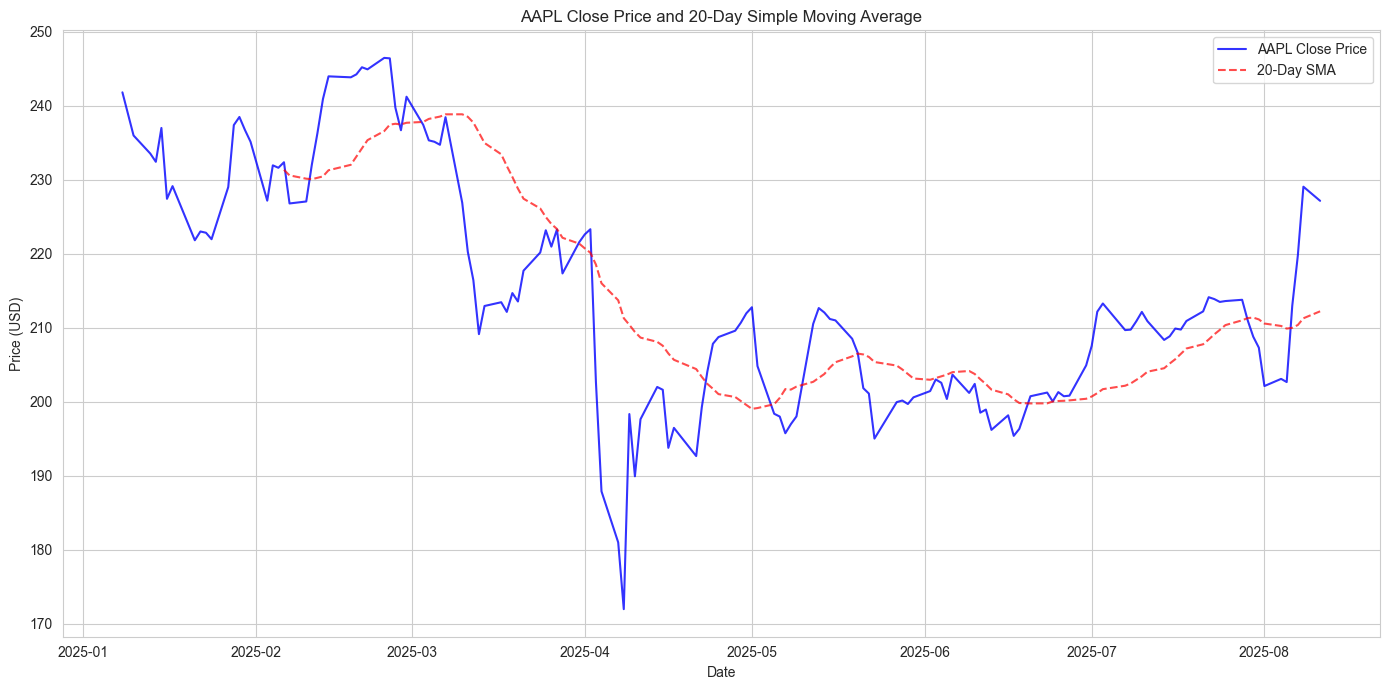

In [15]:
#printing sma-20 vs daily returns
plt.figure(figsize=(14,7))
plt.plot(price_series, label=f'{ticker} Close Price', color='blue', alpha=0.8)
plt.plot(sma_20, label='20-Day SMA', color='red', linestyle='--', alpha=0.7)
plt.title(f'{ticker} Close Price and 20-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

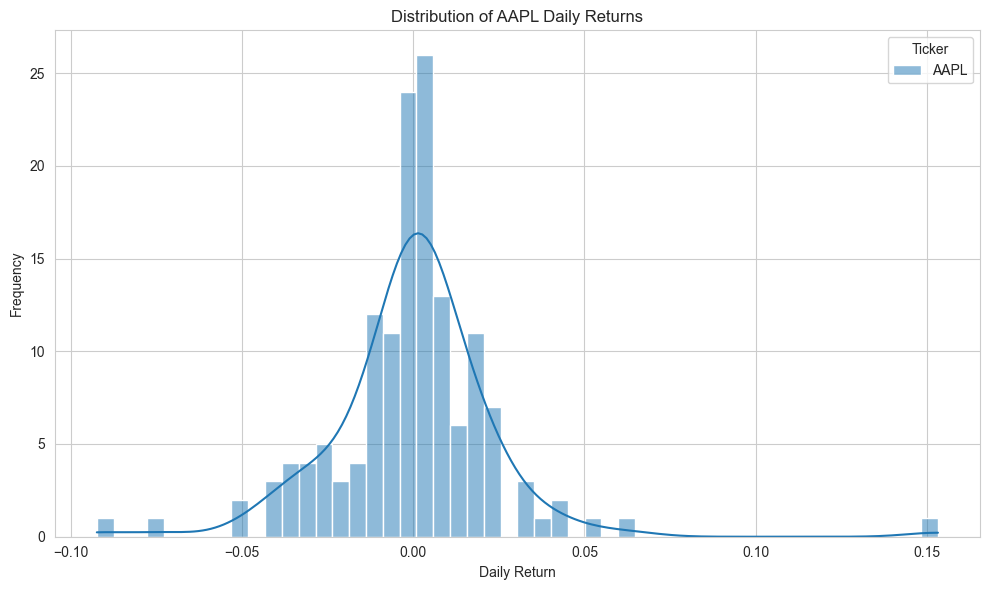

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title(f'Distribution of {ticker} Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Time Series Analysis of Daily Returns

Performing Augmented Dickey-Fuller Test on AAPL Daily Returns:
ADF Statistic: -7.282119158704002
p-value: 1.4909824594908147e-10
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494

Result: Daily Returns are likely Stationary (p-value <= 0.05).
---


<Figure size 1200x600 with 0 Axes>

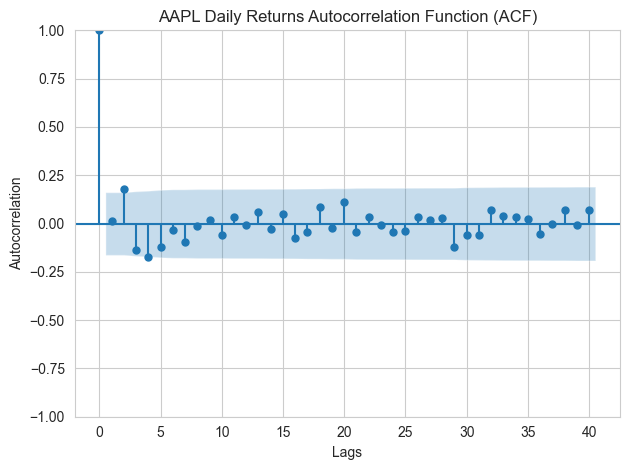

<Figure size 1200x600 with 0 Axes>

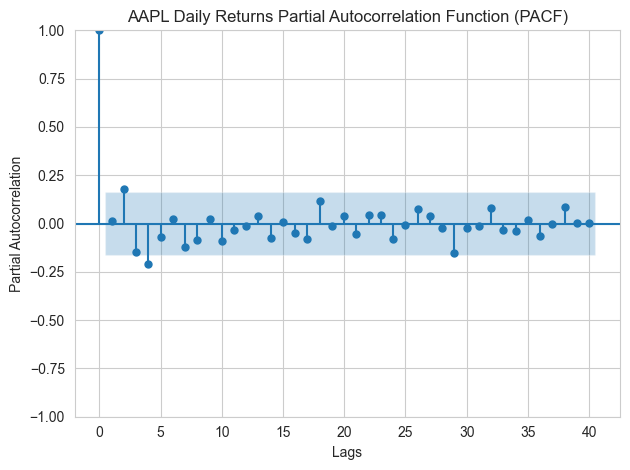

In [ ]:
#We'll use the Augmented Dickey-Fuller (ADF) test to check for stationarity and Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to understand the dependencies within the series.
if not price_series.empty:
    print("\n" + "="*50)
    print("Time Series Analysis of Daily Returns")
    print("="*50)

        # 1. ADF Test for Stationarity of Daily Returns
        #unit root test
    print(f"\nPerforming Augmented Dickey-Fuller Test on {ticker} Daily Returns:")
    # Drop any NaN values that might result from pct_change()
    returns_for_adf = daily_returns.dropna()
    if not returns_for_adf.empty:
        adf_result = adfuller(returns_for_adf)
        print(f"ADF Statistic: {adf_result[0]}")
        print(f"p-value: {adf_result[1]}")
        print("Critical Values:")
        for key, value in adf_result[4].items():
            print(f"\t{key}: {value}")

        if adf_result[1] <= 0.05: # p-value <= 0.05 indicates stationarity
            print("\nResult: Daily Returns are likely Stationary (p-value <= 0.05).")
        else:
            print("\nResult: Daily Returns are likely Non-Stationary (p-value > 0.05).")
        print("---")

    # 2. Autocorrelation Function (ACF) Plot
        plt.figure(figsize=(12, 6))
        plot_acf(returns_for_adf, lags=40, title=f'{ticker} Daily Returns Autocorrelation Function (ACF)')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelation')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # 3. Partial Autocorrelation Function (PACF) Plot
        plt.figure(figsize=(12, 6))
        plot_pacf(returns_for_adf, lags=40, title=f'{ticker} Daily Returns Partial Autocorrelation Function (PACF)')
        plt.xlabel('Lags')
        plt.ylabel('Partial Autocorrelation')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        

